# Analysis of 'The World Happiness Report'



## Term Project: Data Science Team 1

#### Alina Aliakhnovich
#### Mustafa Avci
#### Mei Hui Chen
#### Chetan Khare
#### Buse Tuncel

In [3]:
# for some basic operations
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

sns.set()  
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

import warnings
warnings.filterwarnings('ignore')


from matplotlib import style


In [4]:
df_happiness_index = pd.read_csv('2015.csv')

In [5]:
print("Data Info:\n",(df_happiness_index.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB
Data Info:
 None


In [6]:
df_happiness_index.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
df_happiness_index=df_happiness_index[['Country','Region','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]

Hapiness Rank and Standard Error has been removed from the dataset.

In [8]:
df_happiness_index.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
df_happiness_index.skew(axis=None, skipna=None, level=None, numeric_only=None)

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [10]:
df_happiness_index.kurtosis(axis=None, skipna=None, level=None, numeric_only=None)

Happiness Score                 -0.776075
Economy (GDP per Capita)        -0.866986
Family                           0.918819
Health (Life Expectancy)        -0.393935
Freedom                         -0.460778
Trust (Government Corruption)    1.384787
Generosity                       1.746528
Dystopia Residual                0.534121
dtype: float64

In [11]:
df_happiness_index.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Economy (GDP per Capita),0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


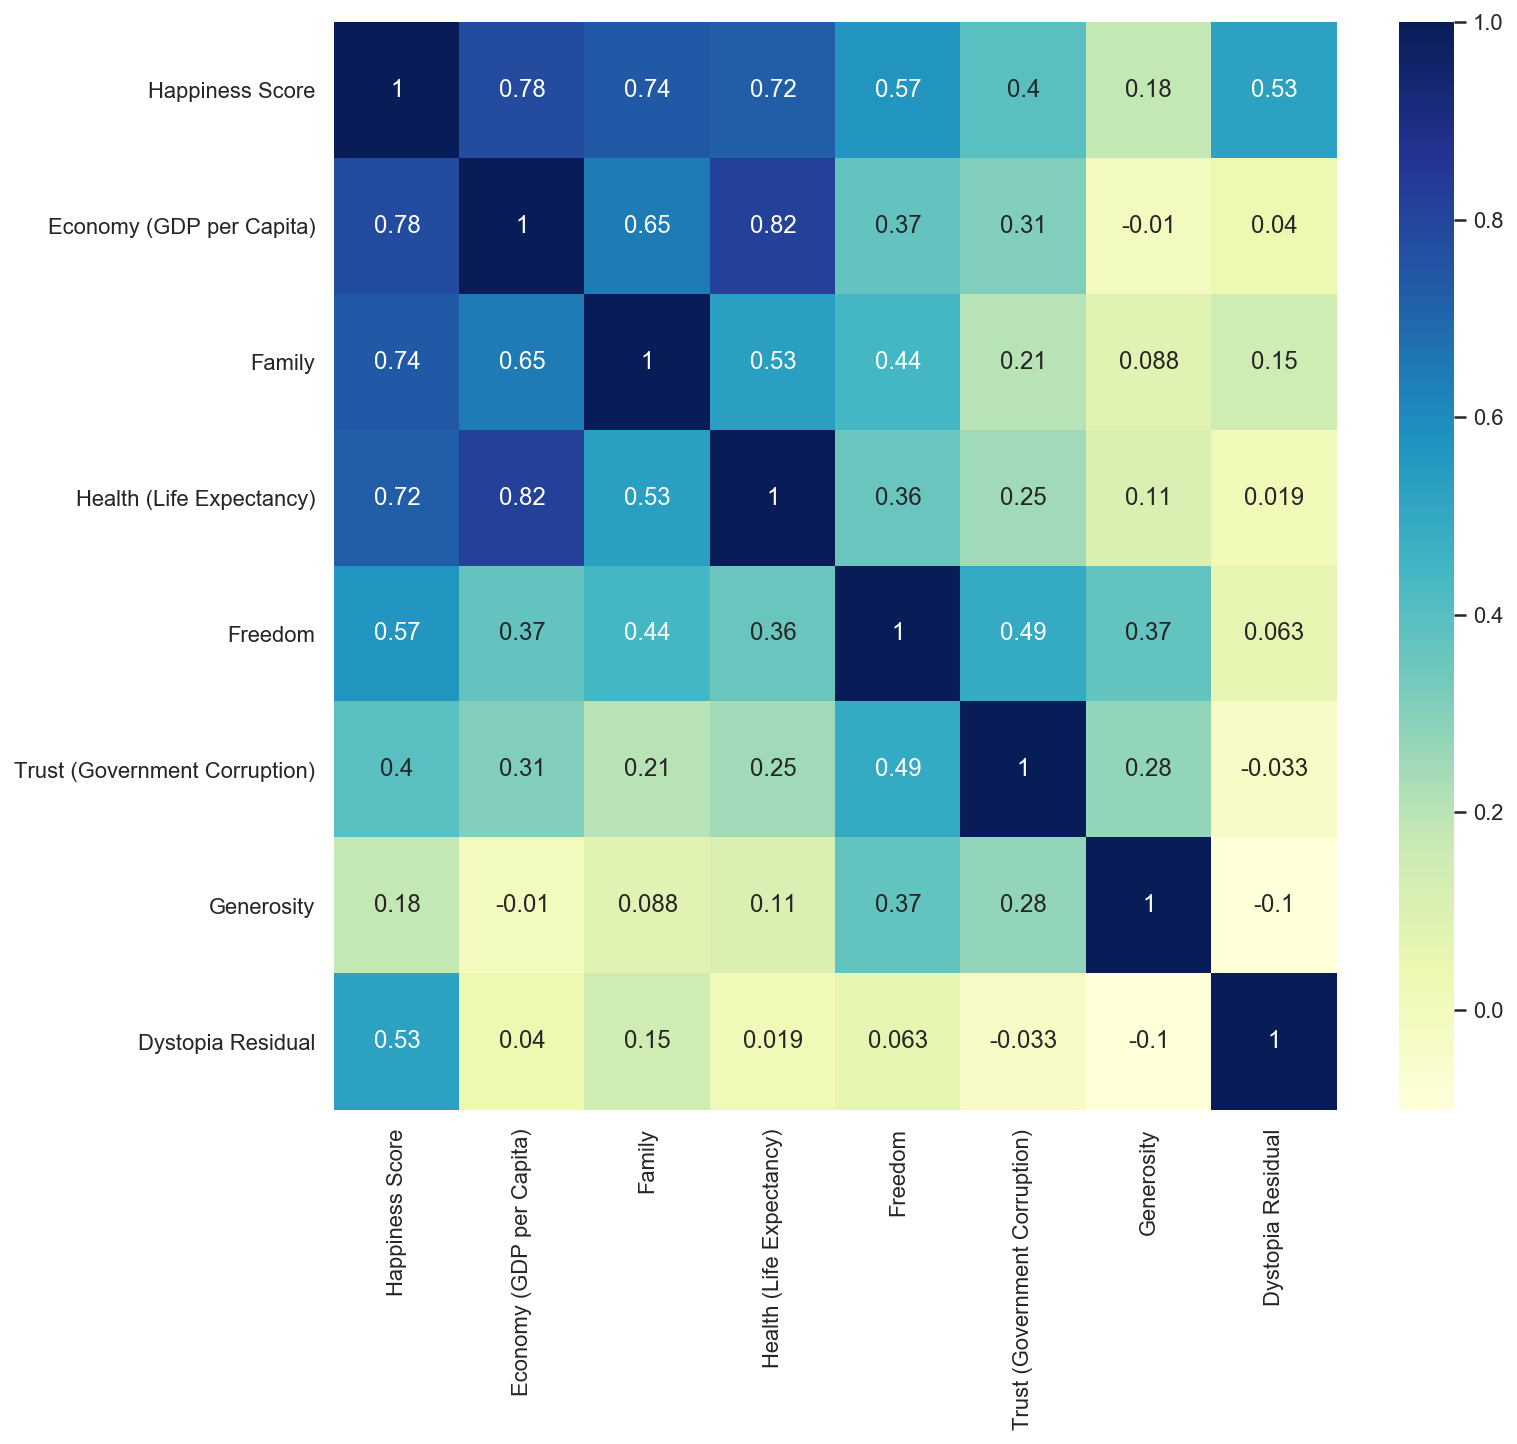

In [12]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df_happiness_index.corr(), cmap = 'YlGnBu', annot = True)

From the figure and the table above it can be concluded that all variables are positively correlated with the Happiness Score and it is primarily correlated with Economy (0.78). It is also highly correlated with Family (0.74) and Health (0.72). It is important to note that Generosity (0.18) is the least correlated with Happiness score; therefore, does not impact the Happiness Score as much as the other variables. Freedom (0.57),  Trust (0.5) and Dystopia (0.53) are moderately correlated with Happiness Score.

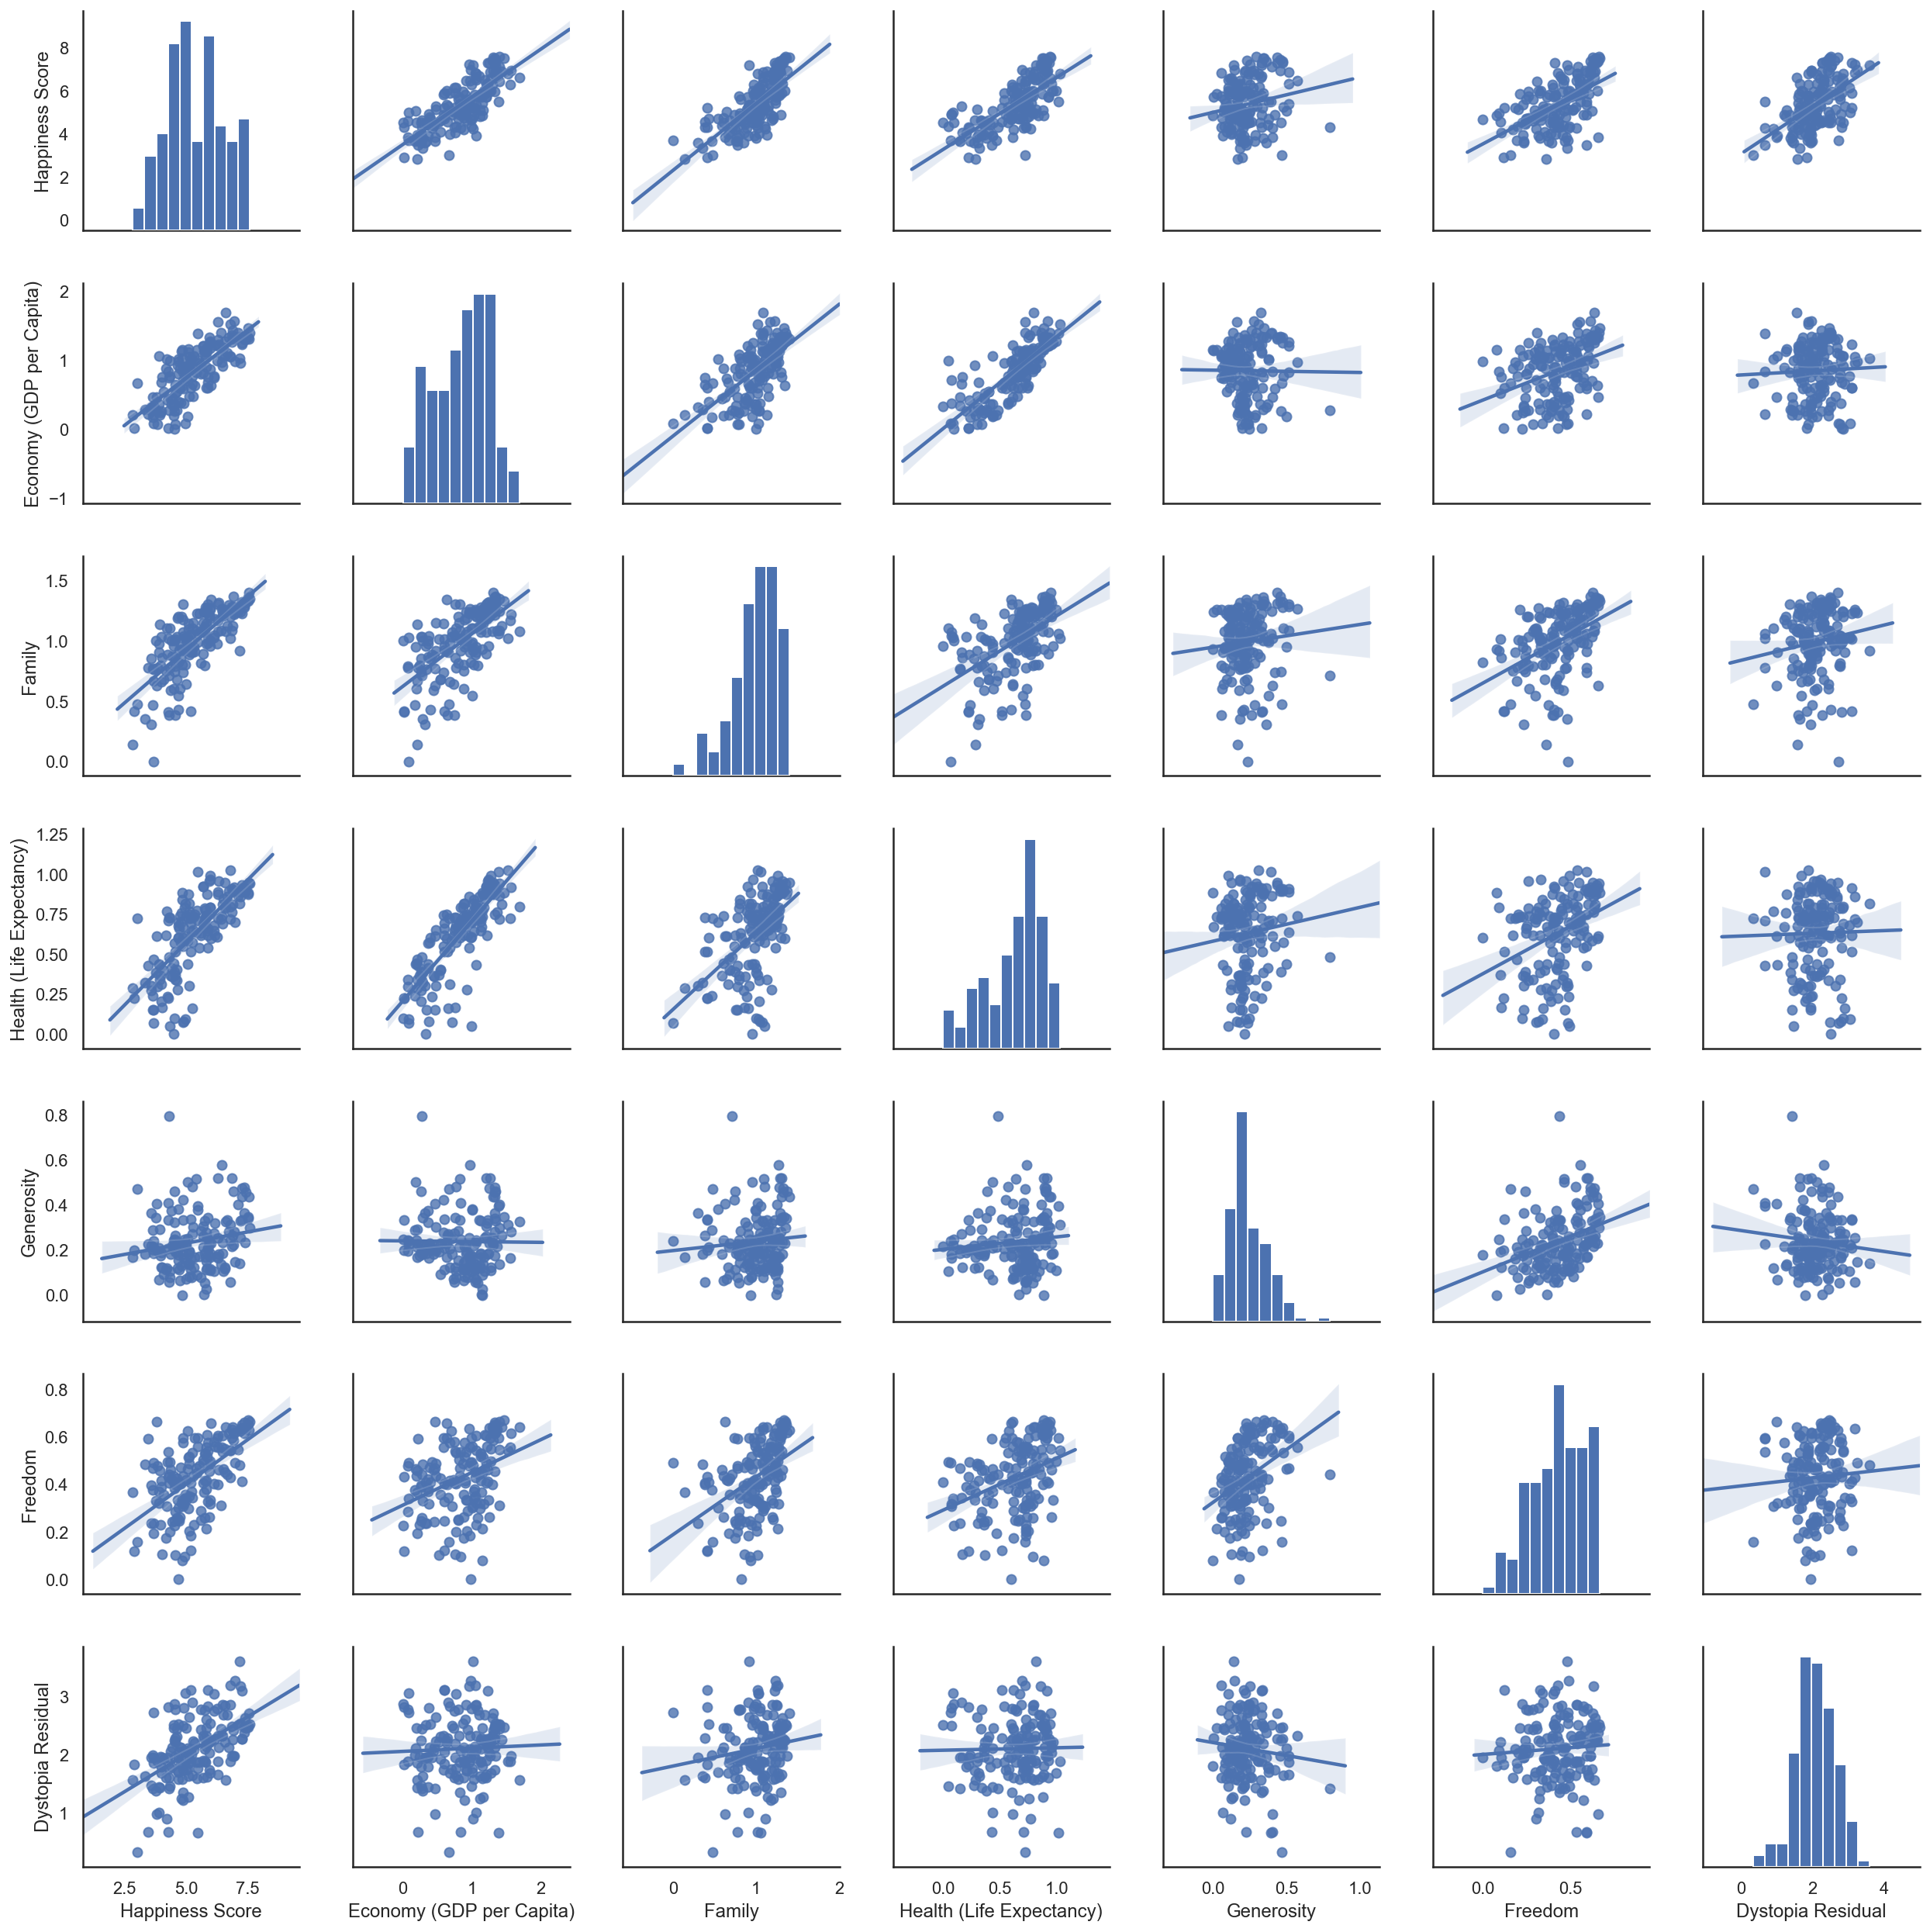

In [13]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(style="white",font_scale=1);
sns.pairplot(df_happiness_index[['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Generosity',
    'Freedom', 'Dystopia Residual']],kind="reg");

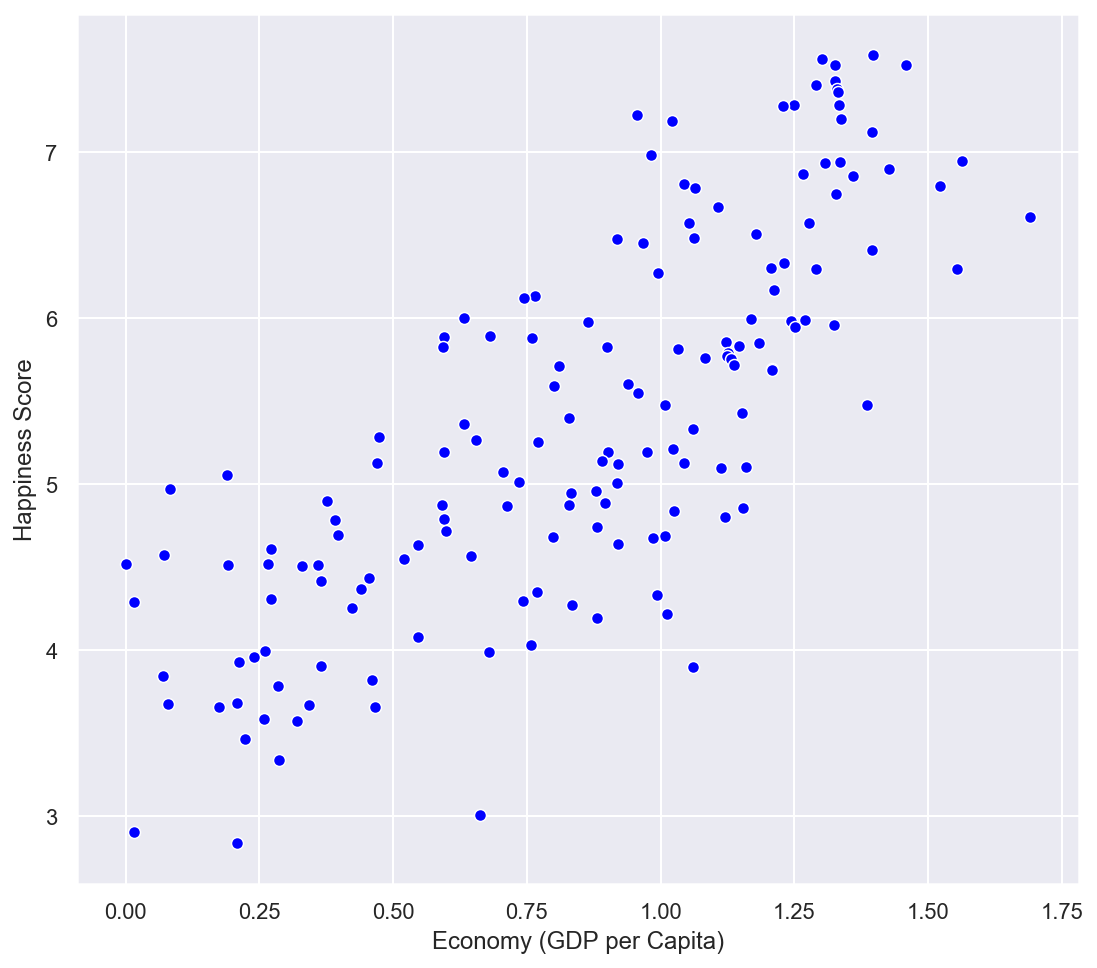

In [14]:
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(data=df_happiness_index, x='Economy (GDP per Capita)', y='Happiness Score', color='blue')

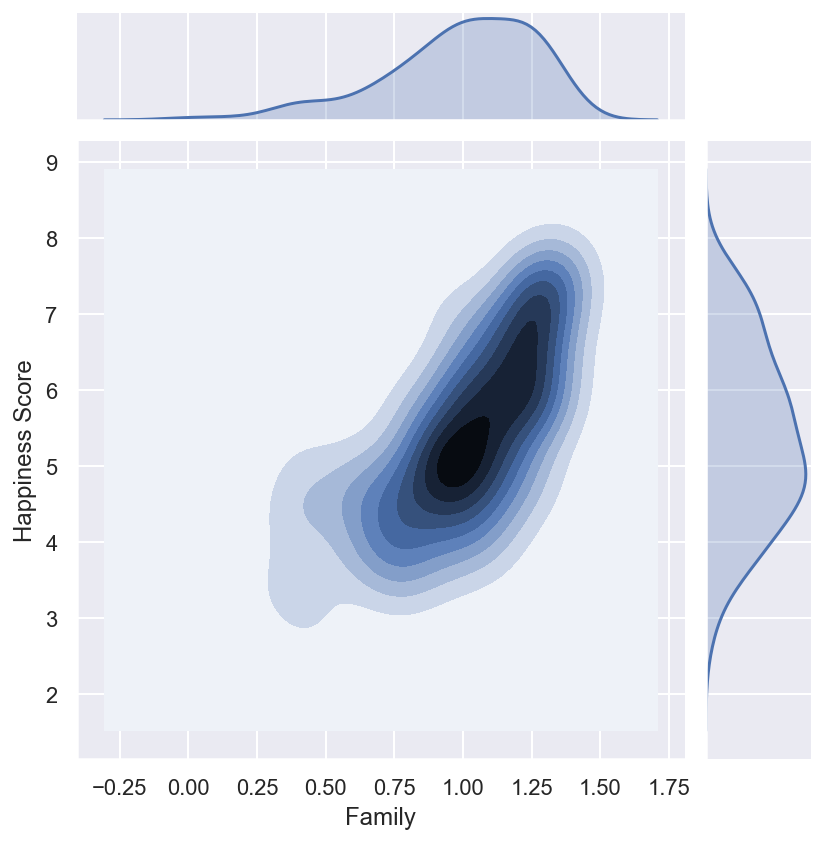

In [15]:
sns.set(rc={'figure.figsize':(8,8)})
sns.jointplot(x="Family", y="Happiness Score", data=df_happiness_index, kind="kde");


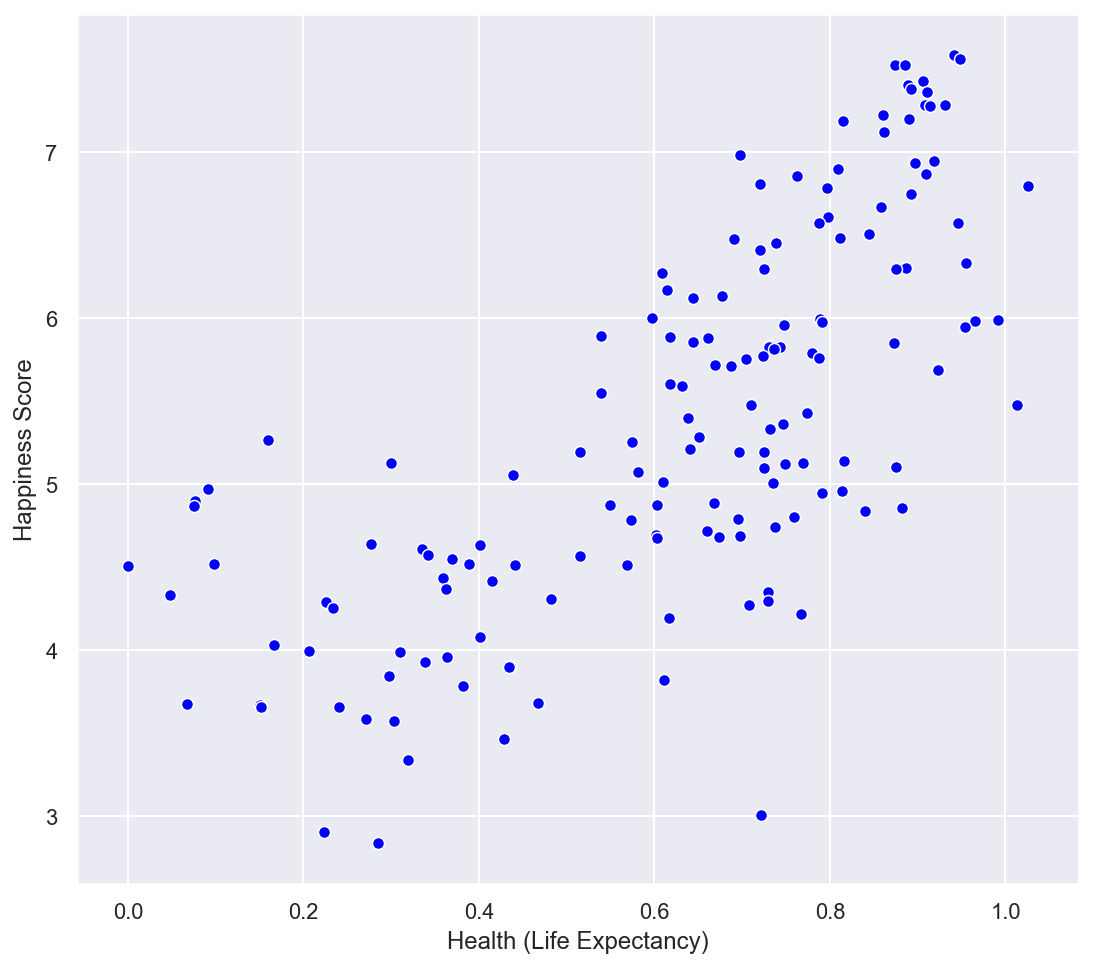

In [17]:
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(data=df_happiness_index, x='Health (Life Expectancy)', y='Happiness Score', color='blue')


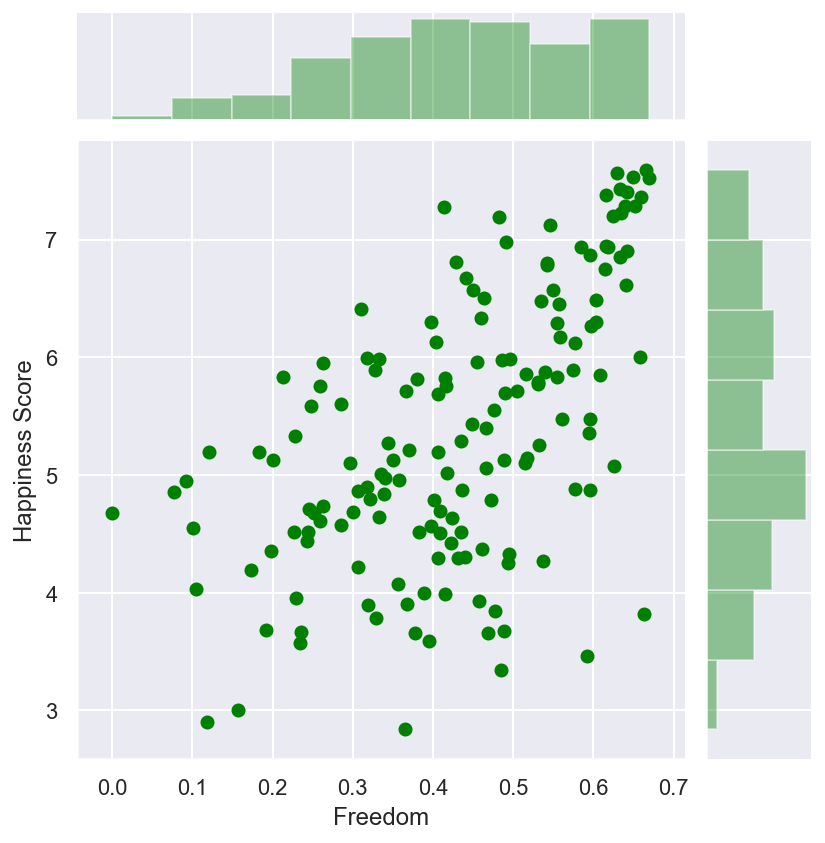

In [18]:
sns.set(rc={'figure.figsize':(8,8)})
sns.jointplot(data=df_happiness_index, x='Freedom', y='Happiness Score', color='green')

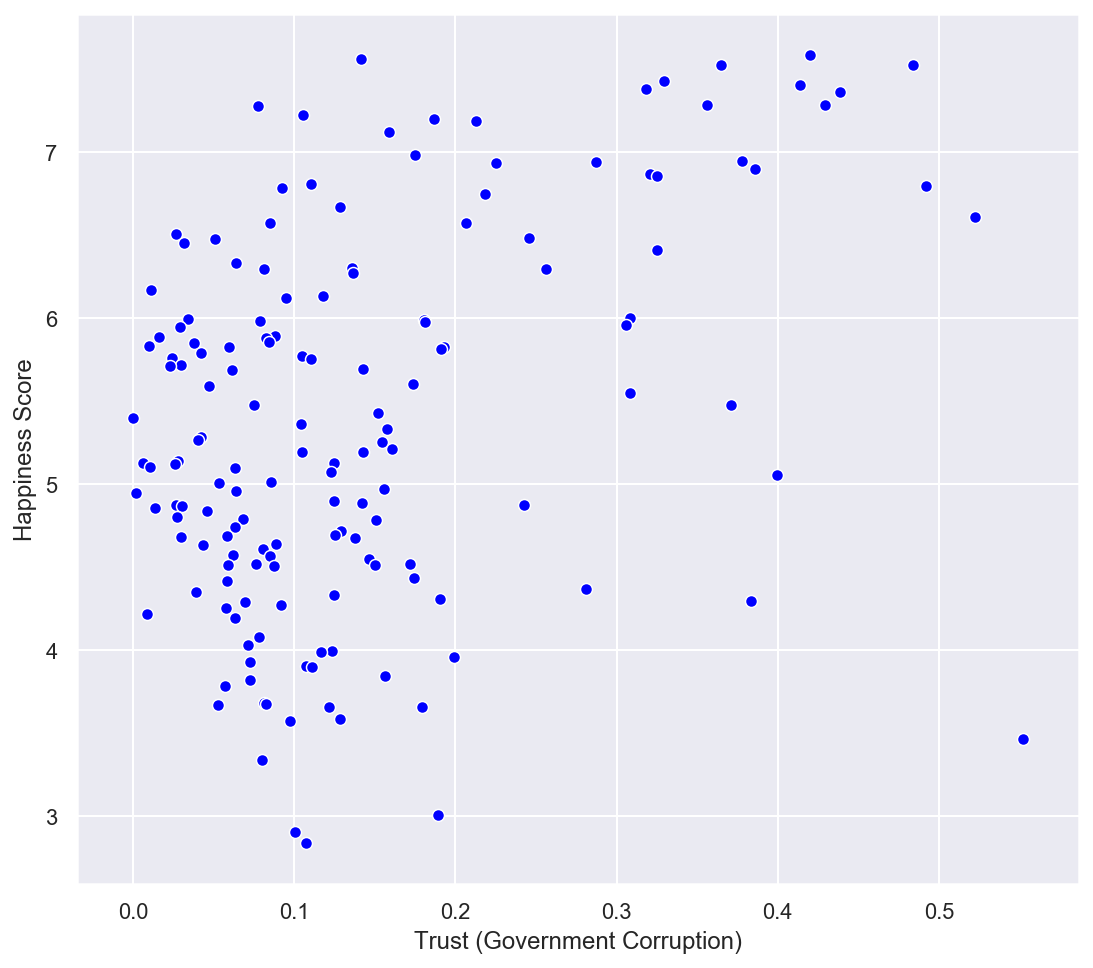

In [19]:
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(data=df_happiness_index, x='Trust (Government Corruption)', y='Happiness Score', color='blue')



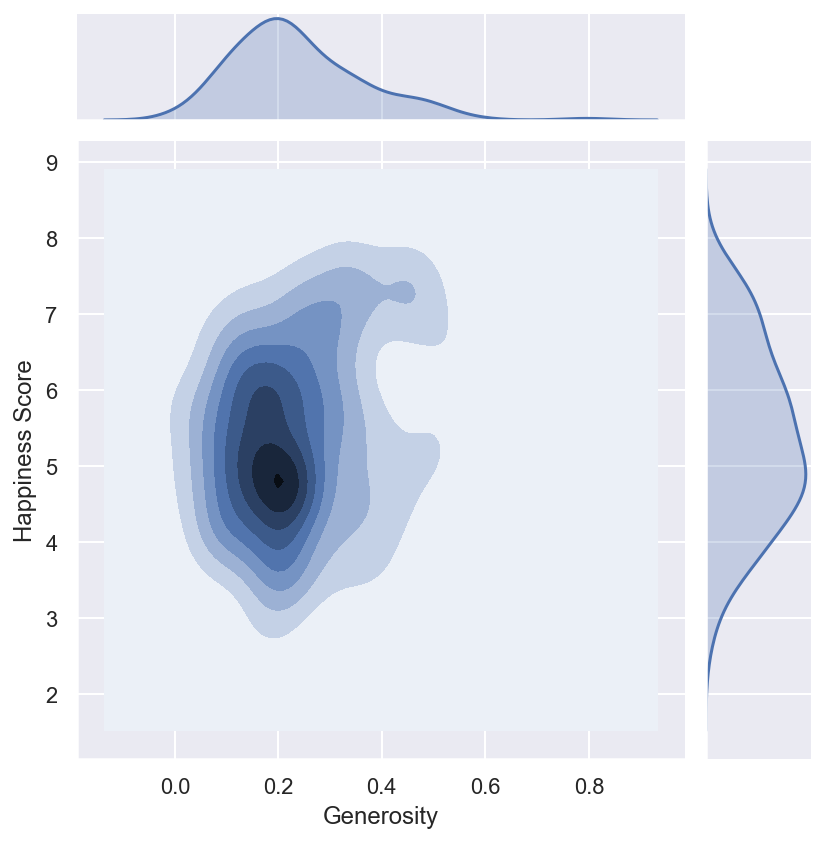

In [20]:

sns.set(rc={'figure.figsize':(8,8)})
sns.jointplot(x="Generosity", y="Happiness Score", data=df_happiness_index, kind="kde");

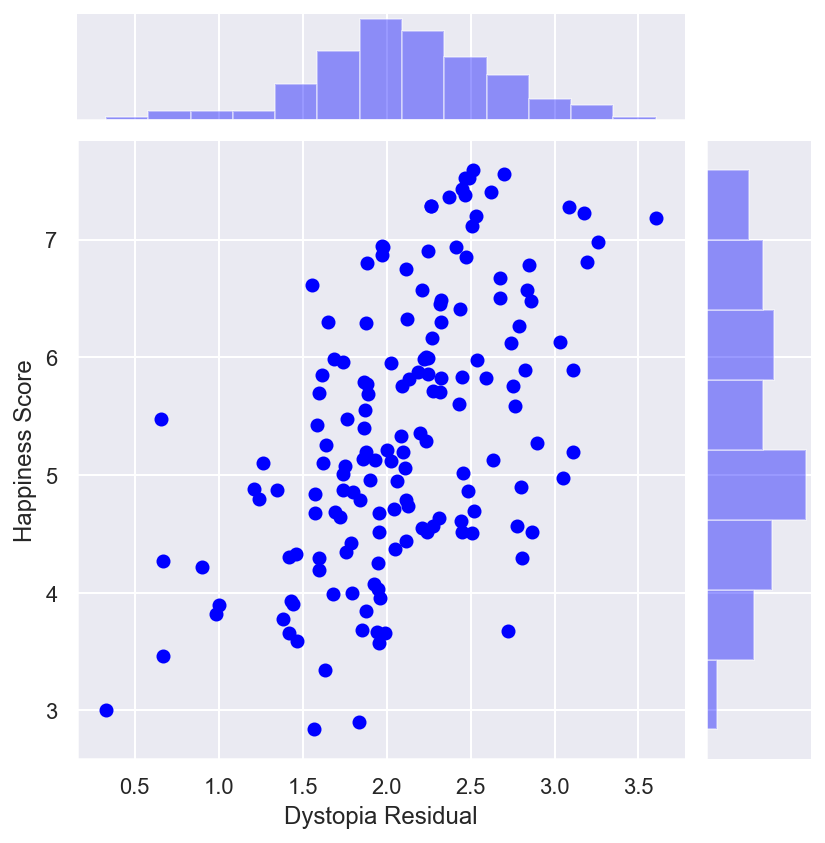

In [21]:
sns.set(rc={'figure.figsize':(8,8)})
sns.jointplot(data=df_happiness_index, x='Dystopia Residual', y='Happiness Score', color='blue')


In [22]:
#percentage 
dot_surv = df_happiness_index[['Happiness Score', 'Region']].groupby(['Region']).mean()
dot_surv


,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


Text(0, 0.5, 'Happiness Score')

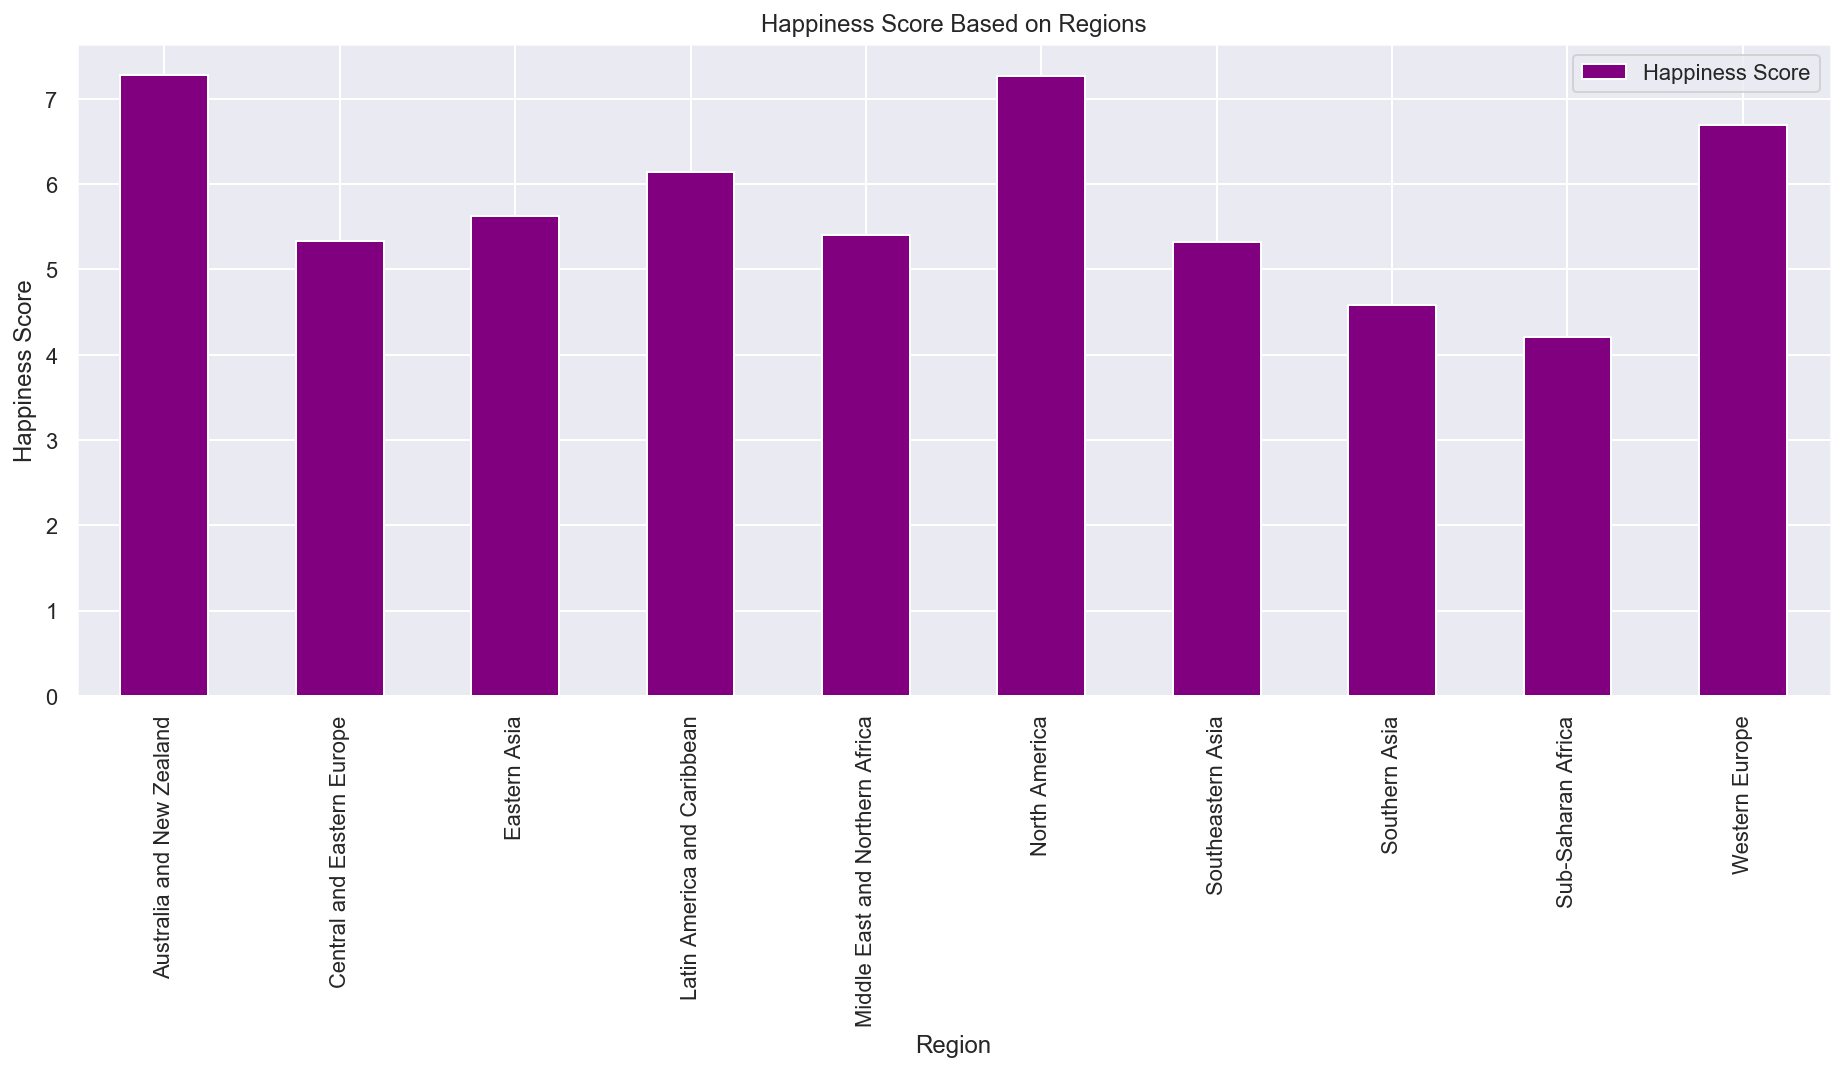

In [23]:
ax = dot_surv.plot.bar(figsize = [14,6], color='purple')
plt.title('Happiness Score Based on Regions')
plt.ylabel('Happiness Score')

[Text(0, 0, 'Western Europe'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'Australia and New Zealand'),
 Text(0, 0, 'Middle East and Northern Africa'),
 Text(0, 0, 'Latin America and Caribbean'),
 Text(0, 0, 'Southeastern Asia'),
 Text(0, 0, 'Central and Eastern Europe'),
 Text(0, 0, 'Eastern Asia'),
 Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'Southern Asia')]

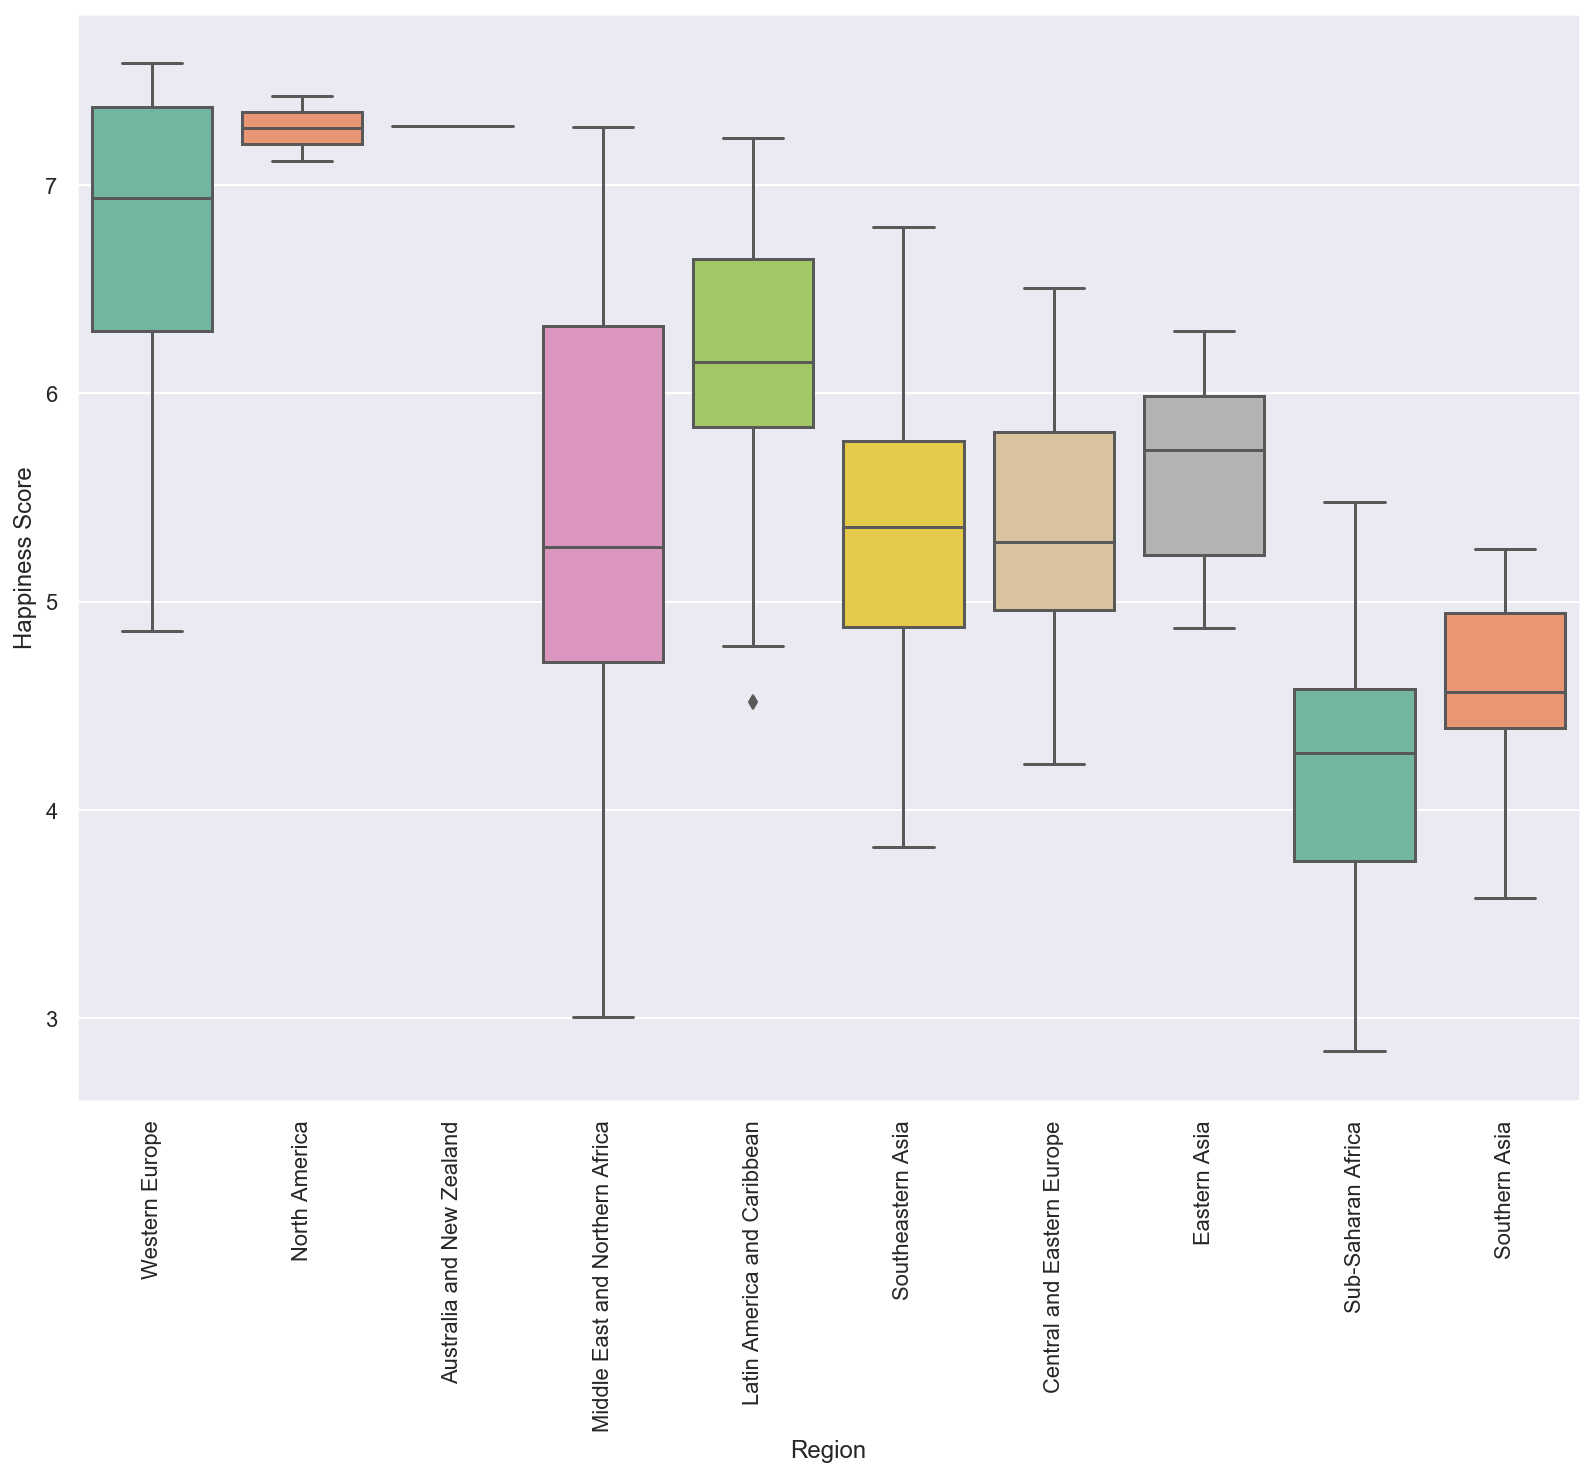

In [24]:
sns.set(rc={'figure.figsize':(12,10)})
plt=sns.boxplot(x="Region", y="Happiness Score",data=df_happiness_index, palette="Set2")
plt.set_xticklabels(plt.get_xticklabels(), rotation=90)




The boxplot shows that European Countries and Australia are the top two Happiest Regions. America is another “happy region” that shows high Happiness Index. The happiness score of Asian and African countries is much lower, that is why none of the Asian nor African Country stands at a good position in terms of Happiness Index. 


In [26]:


graph = bubbleplot(dataset = df_happiness_index, x_column = 'Happiness Score', y_column = 'Generosity', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Generosity", title = 'Comparing Happiness, Generosity and Economy',
    x_logscale = False, scale_bubble = 1, height = 600)

py.iplot(graph, config={'scrollzoom': True})

The bubble chart describes the relationships between happiness, generosity and economy (size of the bubble). Happiness score is directly proportional to the economy, however when the economy score is high, the generosity variable is not as proportional. 

In [27]:
graph = bubbleplot(dataset = df_happiness_index, x_column = 'Happiness Score', y_column = 'Trust (Government Corruption)', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Trust", title = 'Comparing Happiness, Trust and Economy ',
    x_logscale = False, scale_bubble = 1, height = 600)

py.iplot(graph, config={'scrollzoom': True})

The bubble chart describes the relationships between happiness, trust and economy (size of the bubble). Economy is the major contributor to high happiness index, whereas trust variable is not as proportional to the happiness score.

In [ ]:
graph = bubbleplot(dataset = df_happiness_index, x_column = 'Happiness Score', y_column = 'Health (Life Expectancy)', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Health", title = 'Happiness vs Health vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(graph, config={'scrollzoom': True})

The bubble chart describes the relationships between happiness, health and economy (size of the bubble). Happiness, health and economy are directly proportional. The life expectancy increases when the economy has a higher score. 

In [29]:
graph = bubbleplot(dataset = df_happiness_index, x_column = 'Happiness Score', y_column = 'Family', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Family", title = 'Comparing Happiness, Family and Economy ',
    x_logscale = False, scale_bubble = 1, height = 600)

py.iplot(graph, config={'scrollzoom': True})

The bubble chart describes the relationships between happiness, family and economy (size of the bubble). Family Satisfaction ratings increases when the Happiness Score increases. It means that those two variables have a direct relationship between each other.



In [30]:
hapiness_2015 = df_happiness_index['Region'].value_counts()
label_hapiness_2015 = hapiness_2015.index
size_hapiness_2015 = hapiness_2015.values

colors = ['aqua', 'gold', 'yellow', 'crimson', 'magenta']
trace = go.Pie(
         labels = label_hapiness_2015, values = size_hapiness_2015, marker = dict(colors = colors), name = 'hapiness_data', hole = 0.4)
data = [trace]
layout1 = go.Layout(
           title = 'Regions')
graph = go.Figure(data = data, layout = layout1)
py.iplot(graph)

There are only two countries from North America(USA and Canada), and Australia (Australia, and New Zealand) Regions. The highest number of countries are from Sub-Saharan, and Central and Eastern Europe Regions with 40 and 29 countries respectively.

In [31]:
df_happiness_index.sort_values(by='Happiness Score', ascending=False).head(10)

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [32]:
worldmap = [go.Choropleth(
               colorscale = 'Earth',
               locationmode = 'country names',
               locations = df_happiness_index['Country'],
               text = df_happiness_index['Country'], 
               z = df_happiness_index['Economy (GDP per Capita)'],
               )]

layout = dict(title = 'Economy (GDP per Capita)',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))

graph = go.Figure(data = worldmap, layout = layout)
py.iplot(graph)

The figure shows that African countries have the lowest economy index, whereas Australia, Europe and North American countries have the highest score. 

In [33]:
worldmap = [go.Choropleth(
               colorscale = 'Earth',
               locationmode = 'country names',
               locations = df_happiness_index['Country'],
               text = df_happiness_index['Country'], 
               z = df_happiness_index['Family'],
               )]

layout = dict(title = 'Family',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))

graph = go.Figure(data = worldmap, layout = layout)
py.iplot(graph)

The figure shows that some of the African countries have low family index, however the number of counties with low index is not as significant as at the economy figure. Australia, Europe and North American have high family index.

In [34]:
worldmap = [go.Choropleth(
               colorscale = 'Earth',
               locationmode = 'country names',
               locations = df_happiness_index['Country'],
               text = df_happiness_index['Country'], 
               z = df_happiness_index['Health (Life Expectancy)'],
               )]

layout = dict(title = 'Health (Life Expectancy)',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))

graph = go.Figure(data = worldmap, layout = layout)
py.iplot(graph)

Health index is really low in African countries as well as in some of the South Asia countries. Australia, Europe and North American have high health ratings.

### Further Analysis - Percentage Impact of each feature On Happiness Score 




From the Data it can be observed that the “Happiness Score” is the sum of Economy ,Family,Health ,Freedom,Trust ,Generosity and Dystopia Residual.

That means we can calculate for each country what percentage each of the 6 factors impact. 

Feature Creation - 
Impact Percentage of Generosity on happiness score - impact_gen_happ_percent

Impact Percentage of Freedom on happiness score - impact_freedom_happ_percent

Impact Percentage of Health on happiness score -impact_health_happ_percent

Impact Percentage of Family on happiness score -impact_family_happ_percent

Impact Percentage of Economy on happiness score -impact_economy_happ_percent

Impact Percentage of Trust on happiness score -impact_trust_happ_percent





In [35]:
data_percentages_df = df_happiness_index[['Country','Region','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]


In [36]:
##new features "impact_gen_happ_percent . impact_freedom_happ_percent,impact_health_happ_percent, impact_family_happ_percent,impact_economy_happ_percent, impact_trust_happ_percent
data_percentages_df['impact_gen_happ_percent'] =  ((data_percentages_df['Generosity'] / data_percentages_df['Happiness Score'] ) * 100)
data_percentages_df['impact_freedom_happ_percent'] =  ((data_percentages_df['Freedom'] / data_percentages_df['Happiness Score'] ) * 100)
data_percentages_df['impact_economy_happ_percent'] =  ((data_percentages_df['Economy (GDP per Capita)'] / data_percentages_df['Happiness Score'] ) * 100)
data_percentages_df['impact_family_happ_percent'] =  ((data_percentages_df['Family'] / data_percentages_df['Happiness Score'] ) * 100)
data_percentages_df['impact_trust_happ_percent'] =  ((data_percentages_df['Trust (Government Corruption)'] / data_percentages_df['Happiness Score'] ) * 100)
data_percentages_df['impact_health_happ_percent'] =  ((data_percentages_df['Health (Life Expectancy)'] / data_percentages_df['Happiness Score'] ) * 100)
data_percentages_df.head()


,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,impact_gen_happ_percent,impact_freedom_happ_percent,impact_economy_happ_percent,impact_family_happ_percent,impact_trust_happ_percent,impact_health_happ_percent
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,3.911691,8.772506,18.406617,17.787136,5.532885,12.408462
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,5.770401,8.315963,17.224177,18.545563,1.870784,12.535908
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,4.535539,8.627342,17.609672,18.075993,6.424472,11.620035
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4.613002,8.903616,19.396437,17.694097,4.852832,11.768280
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,6.168170,8.522553,17.857681,17.808132,4.437458,12.193753


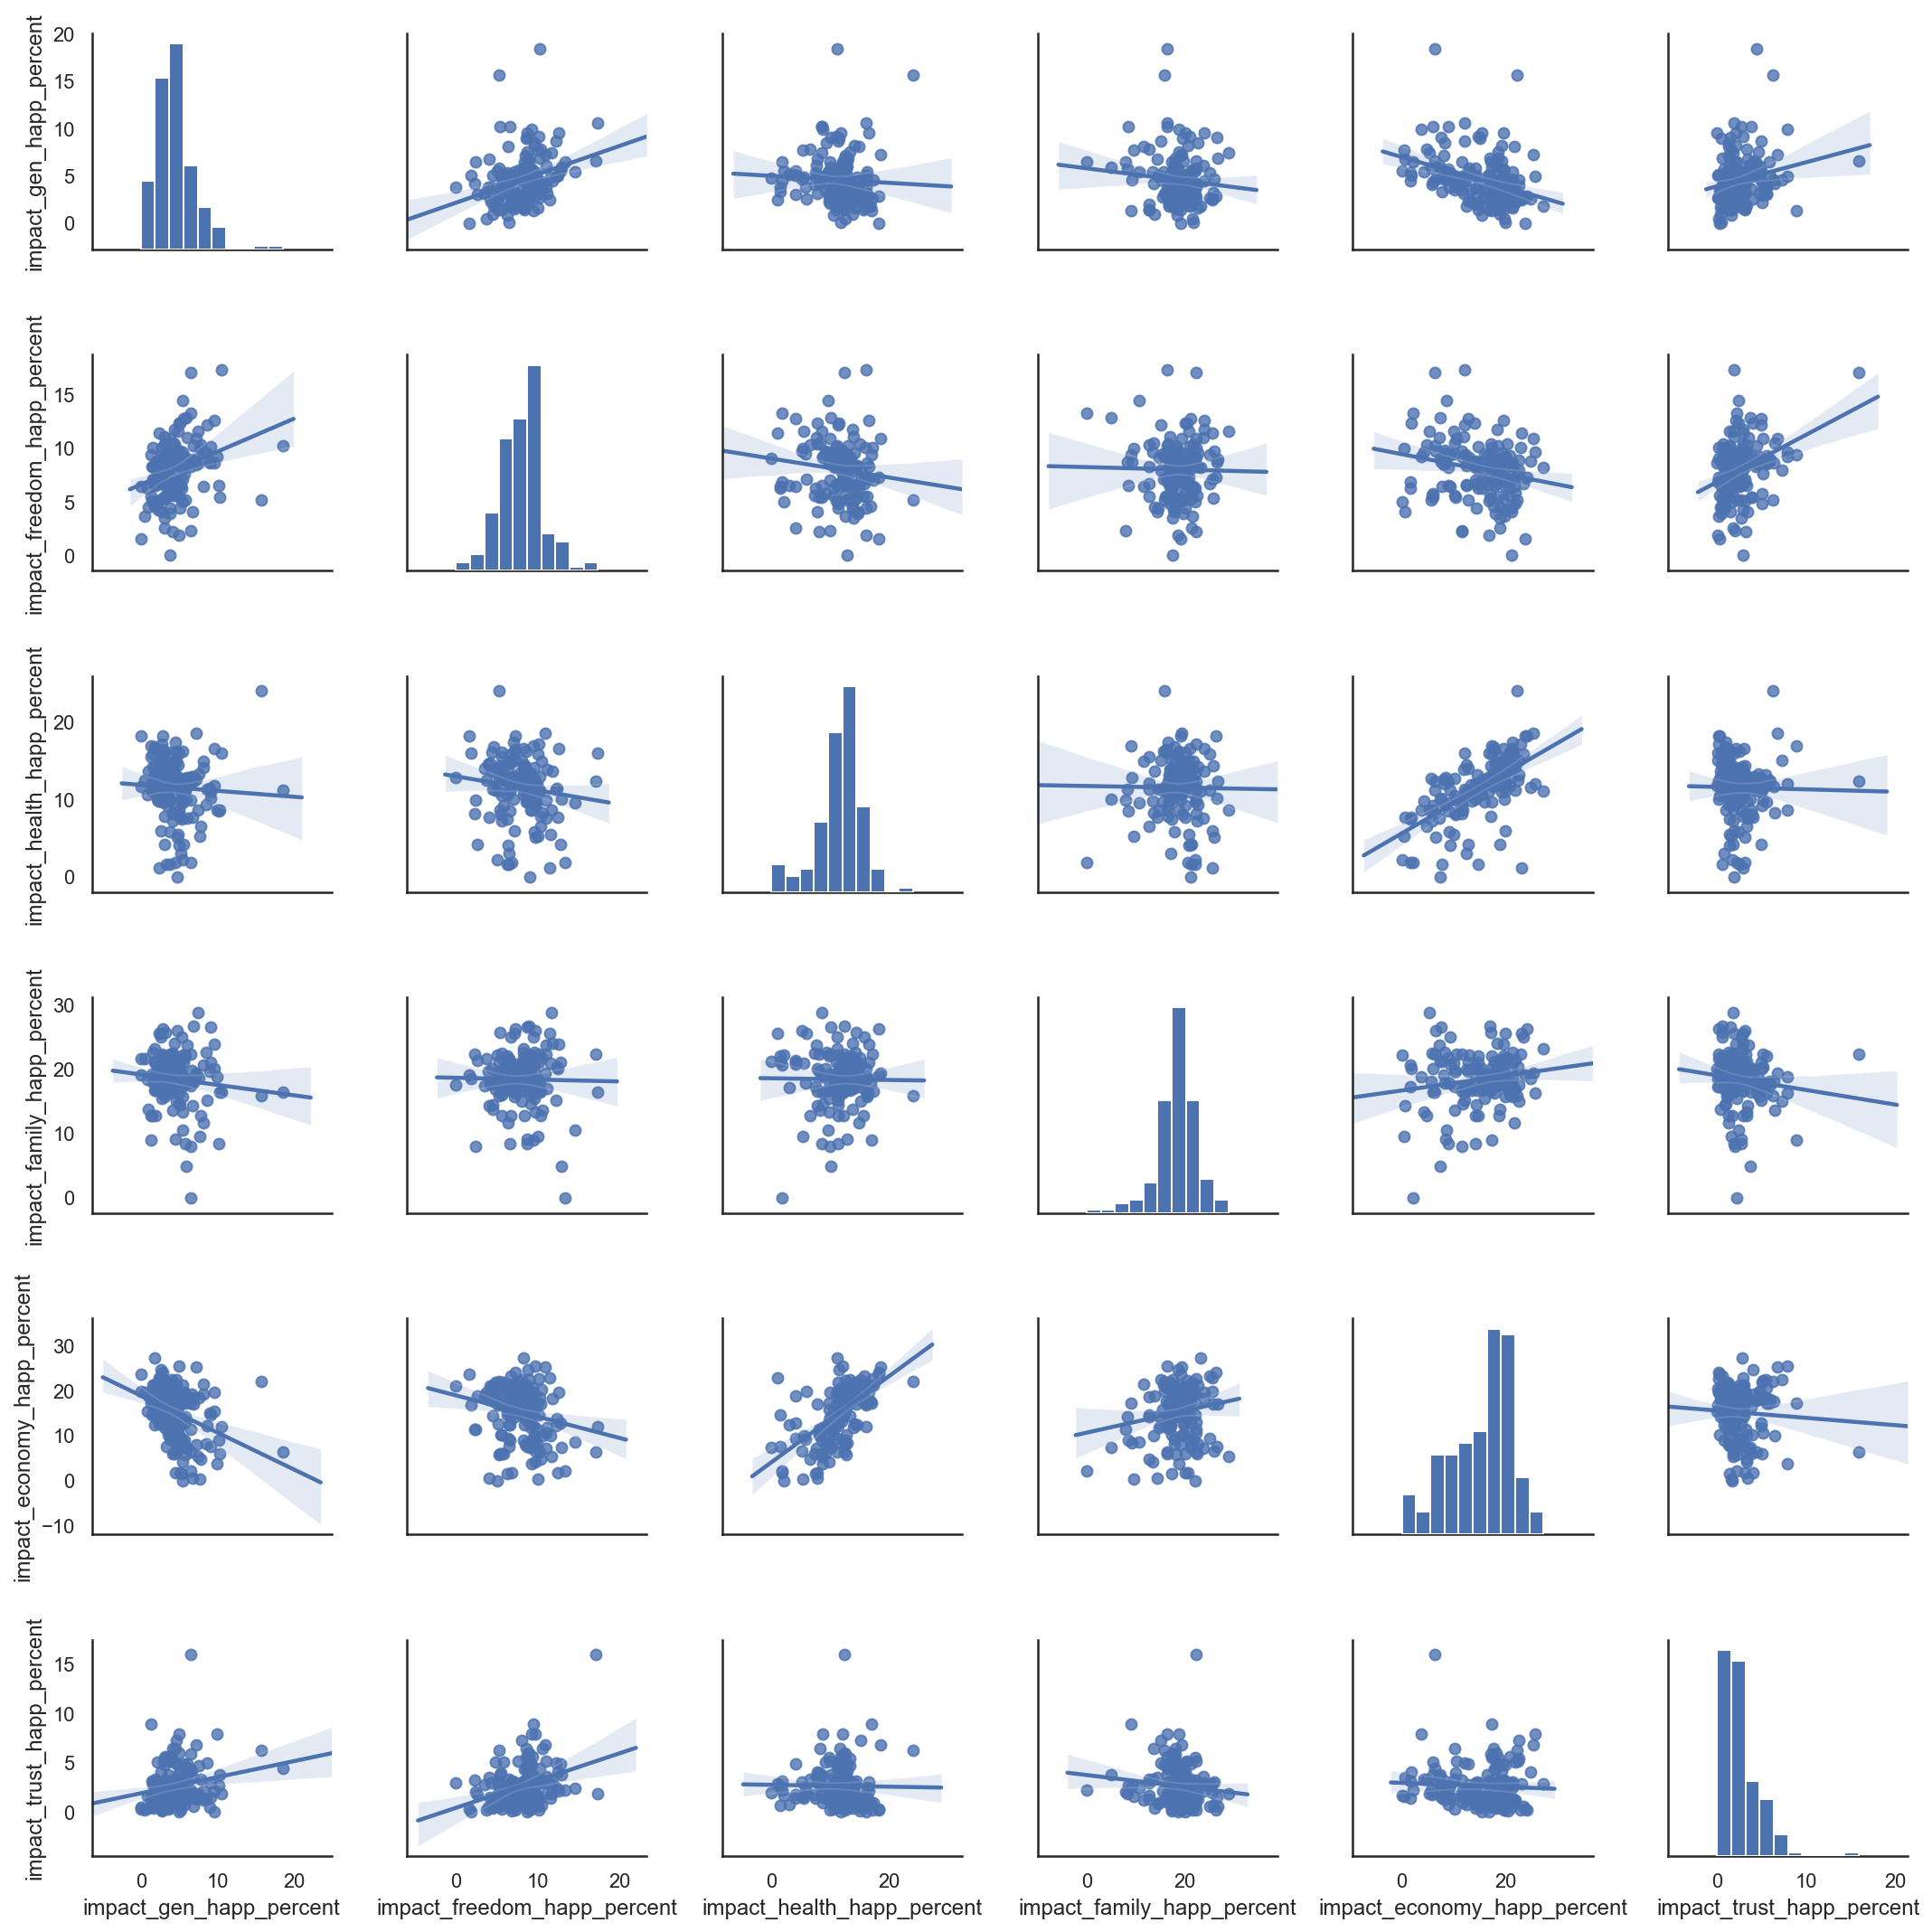

In [37]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(style="white",font_scale=1);
sns.pairplot(data_percentages_df[['impact_gen_happ_percent','impact_freedom_happ_percent','impact_health_happ_percent','impact_family_happ_percent','impact_economy_happ_percent','impact_trust_happ_percent']],kind="reg");

The above pair plot shows some interesting facts:
    1.Impact of Generosity and Impact of Economy are inversly corelated .. contries who give more importance to economy give less importance to "generosity".
    2.Same is the case with Impact of Economy and Freedom
    3.Impact of Trust or Impact of Family have very less correlation with other factors.

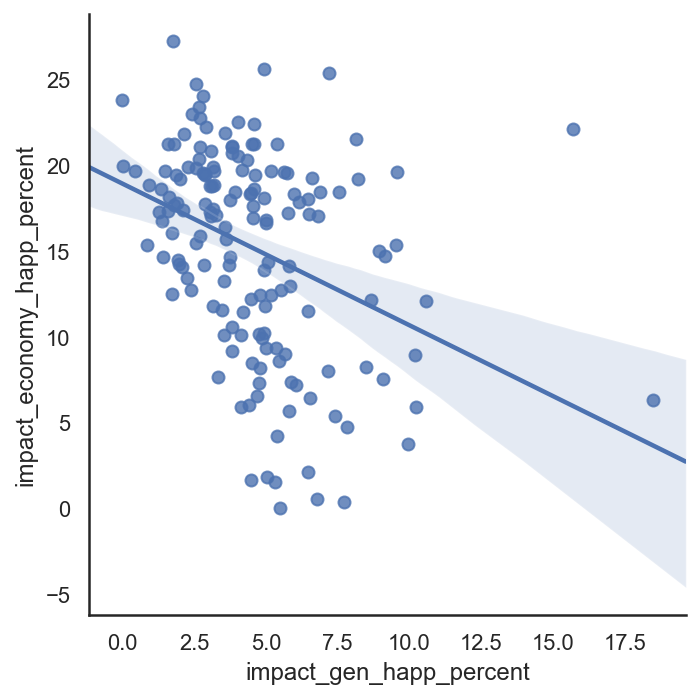

In [38]:
sns.lmplot(x='impact_gen_happ_percent', y='impact_economy_happ_percent', data=data_percentages_df)

In [39]:
data_percentages_df[['Country', 'Happiness Score','Economy (GDP per Capita)','Generosity','impact_gen_happ_percent','impact_economy_happ_percent']].sort_values(by='impact_gen_happ_percent', ascending=False).head(5)

,Country,Happiness Score,Economy (GDP per Capita),Generosity,impact_gen_happ_percent,impact_economy_happ_percent
128,Myanmar,4.307,0.27108,0.79588,18.478756,6.293940
155,Syria,3.006,0.66320,0.47179,15.694943,22.062542
144,Cambodia,3.819,0.46038,0.40359,10.567950,12.054988
118,Haiti,4.518,0.26673,0.46187,10.222886,5.903718
152,Afghanistan,3.575,0.31982,0.36510,10.212587,8.946014


These are the Top 5 countries which have high impact of Generosity on their happiness. and it shows a surprising factor that even their GDP per capita is low, happines score is low .. still they have high importance for generosity

In [40]:
data_percentages_df[['Country', 'Happiness Score','impact_health_happ_percent','Health (Life Expectancy)']].sort_values(by='impact_health_happ_percent', ascending=False).head(5)

,Country,Happiness Score,impact_health_happ_percent,Health (Life Expectancy)
155,Syria,3.006,24.016301,0.72193
71,Hong Kong,5.474,18.510778,1.01328
133,Bulgaria,4.218,18.171882,0.76649
101,Greece,4.857,18.162034,0.88213
102,Lebanon,4.839,17.348006,0.83947


Top 5 Countries having most impact of health (life expectancy) on hapiness.

In [41]:
data_percentages_df[['Country', 'Happiness Score','impact_freedom_happ_percent','Freedom']].sort_values(by='impact_freedom_happ_percent', ascending=False).head(5)

,Country,Happiness Score,impact_freedom_happ_percent,Freedom
144,Cambodia,3.819,17.346426,0.66246
153,Rwanda,3.465,17.085426,0.59201
154,Benin,3.340,14.505988,0.48450
147,Central African Republic,3.678,13.289560,0.48879
157,Togo,2.839,12.840085,0.36453


Top 5 Countries having most impact of freedom on happiness.

In [42]:
data_percentages_df[['Country', 'Happiness Score','impact_trust_happ_percent','Trust (Government Corruption)']].sort_values(by='impact_trust_happ_percent', ascending=False).head(5)

,Country,Happiness Score,impact_trust_happ_percent,Trust (Government Corruption)
153,Rwanda,3.465,15.928139,0.55191
129,Georgia,4.297,8.920410,0.38331
27,Qatar,6.611,7.897141,0.52208
90,Somaliland region,5.057,7.895590,0.39928
23,Singapore,6.798,7.238894,0.49210


Top 5 Countries having most impact of Trust on Government on happiness.

In [43]:
data_percentages_df[['Country', 'Happiness Score','Economy (GDP per Capita)','impact_economy_happ_percent']].sort_values(by='impact_economy_happ_percent', ascending=False).head(5)

,Country,Happiness Score,Economy (GDP per Capita),impact_economy_happ_percent
142,Gabon,3.896,1.06024,27.213552
27,Qatar,6.611,1.69042,25.569808
71,Hong Kong,5.474,1.38604,25.320424
38,Kuwait,6.295,1.55422,24.689754
133,Bulgaria,4.218,1.01216,23.996207
